# medARC-QA

Code to generate Figure 2 and S1

In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scienceplots

plt.style.use(['nature'])
plt.rcParams['figure.dpi'] = 300


In [2]:
folder_path = 'eval_results'
file_pattern = os.path.join(folder_path, '*_health_summary.json')
file_paths = glob.glob(file_pattern)

data = []
for file_path in file_paths:
    try:
        with open(file_path, 'r') as f:
            content = json.load(f)
        accuracy = content['health']['acc']
        model_name = os.path.basename(file_path).replace('_health_summary.json', '')  # Remove the suffix to get the model name
        data.append({'model': model_name, 'accuracy': accuracy})
    
    except (FileNotFoundError, json.JSONDecodeError, KeyError) as e:
        print(f"Error processing file {file_path}: {e}")

df = pd.DataFrame(data)
df['model'] = df['model'].str.replace(r'-Instruct-*', '', regex=True)
df['model'] = df['model'].str.replace(r'v0.1', '', regex=True)
df['model'] = df['model'].str.replace(r'-20240229', '', regex=True)

print(df)

                         model  accuracy
0                Llama-3.1-70B      0.44
1                medalpaca-13b      0.00
2                 Meditron3-8B      0.23
3                Meditron3-70B      0.00
4                claude-3-opus      0.38
5                 Llama-3.1-8B      0.23
6                  gpt-4o-mini      0.15
7      gemini-1.5-flash-latest      0.28
8        gemini-1.5-pro-latest      0.50
9               Mistral-7Bv0.3      0.20
10                     o1-mini      0.31
11  Llama3.1-405b-instruct-fp8      0.34
12               Llama-3.3-70B      0.34
13                      gpt-4o      0.25
14             claude-3-sonnet      0.29
15        o1-2024-12-17_200000      0.48


In [3]:
human_avg = np.mean([.83, .61, .65, 0.47, 0.72]) 
human_std = np.std([.83, .61, .65, 0.47, 0.72]) 

df['order'] = [5, 0, 1, 2, 9, 4, 12, 10, 11, 3, 14, 6, 7, 13, 8, 15]
df = df.sort_values('order')
df.loc[-1] = ['Human', human_avg, 16] 

df['colors'] = ['#1f77b4', '#ff7f0e', '#ff7f0e', '#2ca02c', 
                '#d62728',  '#d62728', '#d62728', '#d62728',
                '#9467bd', '#9467bd',
                '#8c564b', '#8c564b', 
                '#f7b6d2', '#f7b6d2',
                 '#e377c2', '#e377c2',  '#7f7f7f']

df["model"] = df["model"].str.replace('medalpaca-13b', 'Medalpaca-13b', regex=False)
df["model"] = df["model"].str.replace('Meditron3-8B', 'Meditron3-8b', regex=False)
df["model"] = df["model"].str.replace('claude-3-sonnet', 'Claude 3 Sonnet', regex=False)
df["model"] = df["model"].str.replace('claude-3-opus', 'Claude 3 Opus', regex=False)
df["model"] = df["model"].str.replace('Mistral-7Bv0.3', 'Mistral 7b', regex=False)
df["model"] = df["model"].str.replace('Llama-3.1-8B', 'Llama 3.1 8b', regex=False)
df["model"] = df["model"].str.replace('Llama-3.1-70B', 'Llama 3.1 70b', regex=False)
df["model"] = df["model"].str.replace('Llama3.1-405b-instruct-fp8', 'Llama 3.1 405b(fp8)', regex=False)
df["model"] = df["model"].str.replace('gemini-1.5-flash-latest', 'Gemini 1.5 Flash', regex=False)
df["model"] = df["model"].str.replace('gemini-1.5-pro-latest', 'Gemini 1.5 Pro', regex=False)
df["model"] = df["model"].str.replace('gpt-4o-mini', 'GPT-4o-mini', regex=False)
df["model"] = df["model"].str.replace('gpt-4o', 'GPT-4o', regex=False)
df["model"] = df["model"].str.replace('o1-2024-12-17_200000', 'o1', regex=False)

print(df)

                   model  accuracy  order   colors
 1         Medalpaca-13b     0.000      0  #1f77b4
 2          Meditron3-8b     0.230      1  #ff7f0e
 3         Meditron3-70B     0.000      2  #ff7f0e
 9            Mistral 7b     0.200      3  #2ca02c
 5          Llama 3.1 8b     0.230      4  #d62728
 0         Llama 3.1 70b     0.440      5  #d62728
 11  Llama 3.1 405b(fp8)     0.340      6  #d62728
 12        Llama-3.3-70B     0.340      7  #d62728
 14      Claude 3 Sonnet     0.290      8  #9467bd
 4         Claude 3 Opus     0.380      9  #9467bd
 7      Gemini 1.5 Flash     0.280     10  #8c564b
 8        Gemini 1.5 Pro     0.500     11  #8c564b
 6           GPT-4o-mini     0.150     12  #f7b6d2
 13               GPT-4o     0.250     13  #f7b6d2
 10              o1-mini     0.310     14  #e377c2
 15                   o1     0.480     15  #e377c2
-1                 Human     0.656     16  #7f7f7f


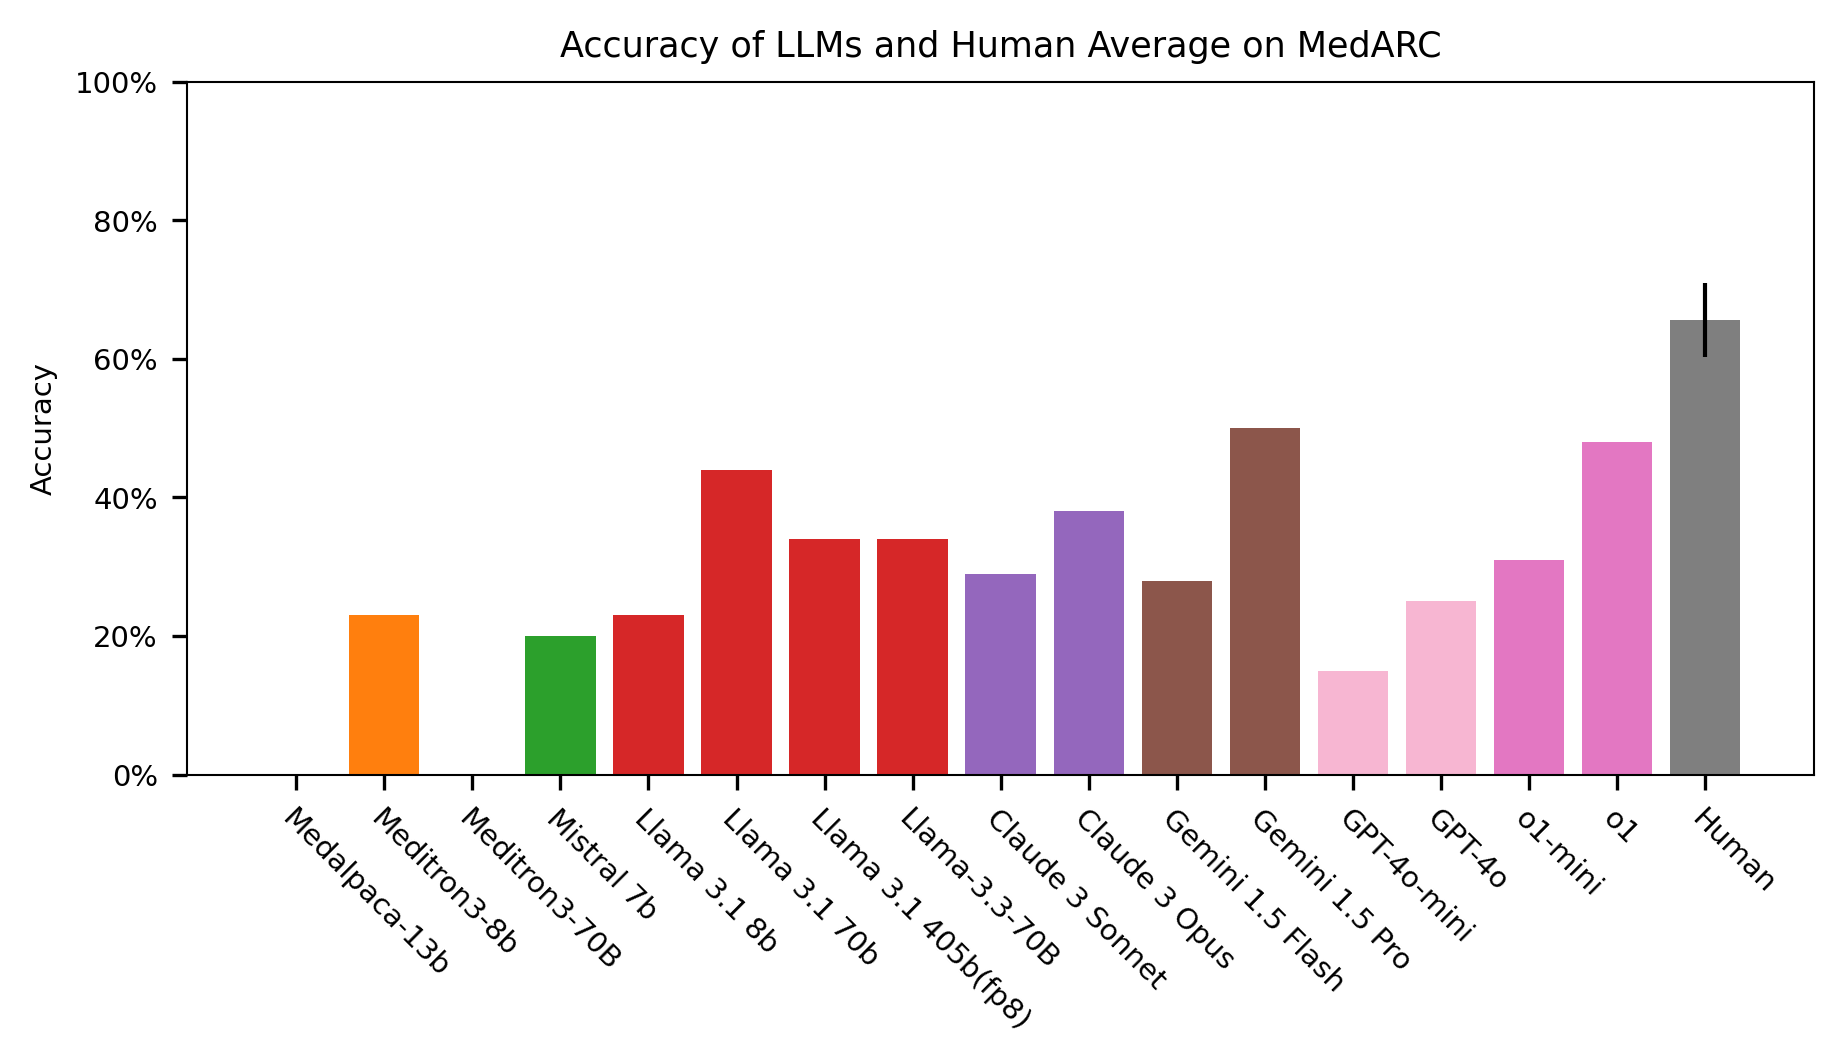

In [4]:
models = df['model']
accuracies = df['accuracy']

fig, ax = plt.subplots(figsize=(7,3))

# Group colors
ax.bar(models, accuracies, color=df['colors'])

# standard error bar
ax.errorbar(
    x=len(models) - 1,  
    y=accuracies.iloc[-1],
    yerr=human_std/np.sqrt(5),
    color='black', 
    capsize=None,
    elinewidth=1,
)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of LLMs and Human Average on MedARC')

ax.set_ylim(0, 1)  # Assuming the values range from 0 to 1
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))

plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor" ) 

plt.ylim(0,1)
plt.show()


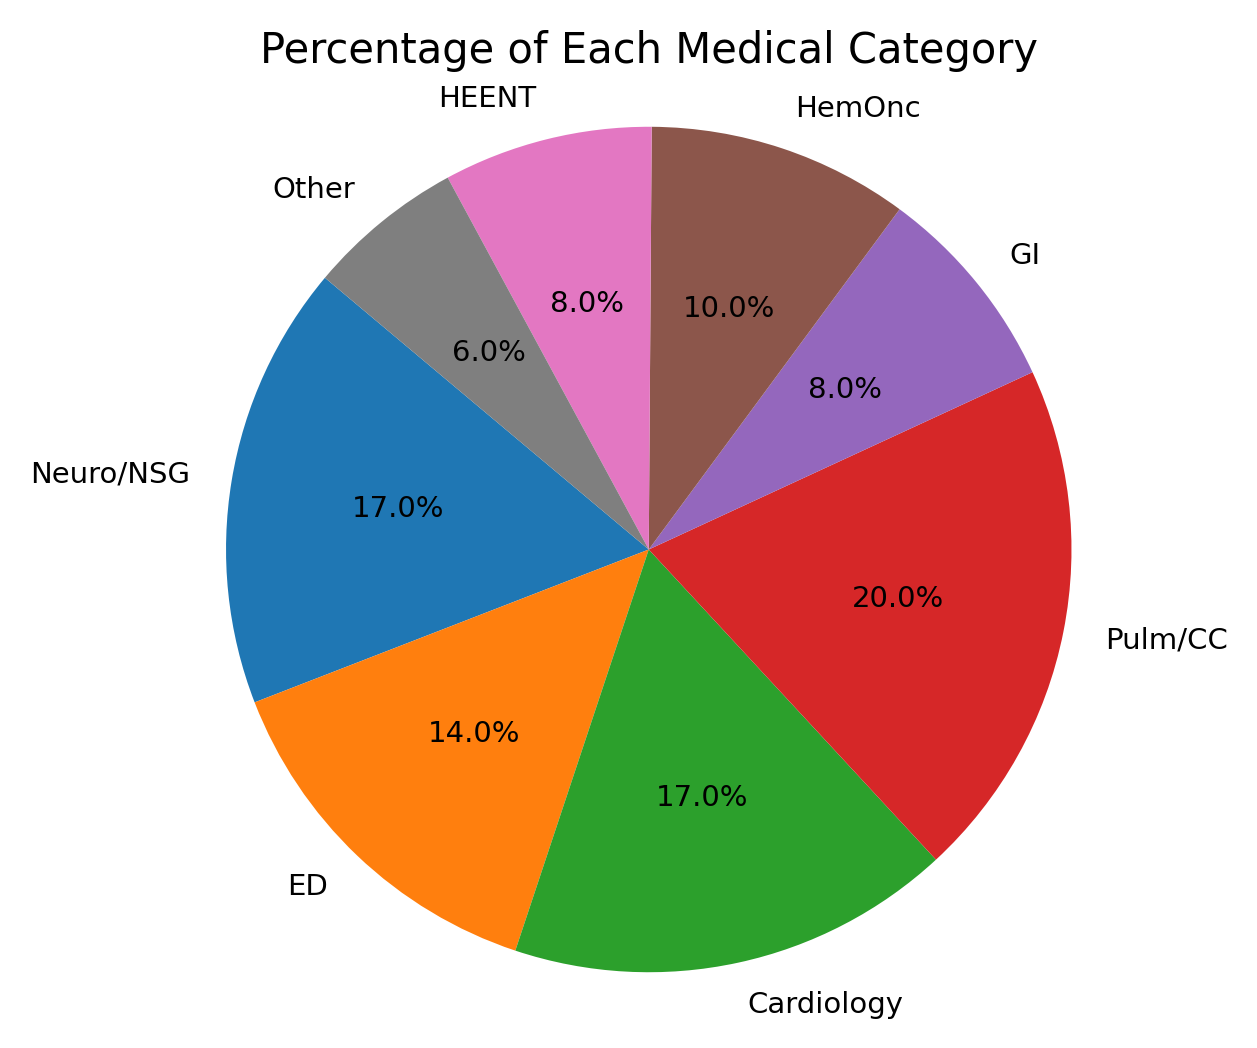

In [6]:
# Cats
categories = {
    "Neuro/NSG": 17,
    "ED": 14,
    "Cardiology": 17,
    "ID": 3,
    "Pulm/CC": 20,
    "GI": 8,
    "HemOnc": 10,
    "ObGyn": 1,
    "HEENT": 8,
    "Ophtho": 2
}

# Lump together cats with <5 counts into Other
lumped_categories = {}
other_count = 0

for cat, count in categories.items():
    if count < 5:
        other_count += count
    else:
        lumped_categories[cat] = count

# Add "Other" category
if other_count > 0:
    lumped_categories["Other"] = other_count

labels = list(lumped_categories.keys())
sizes = list(lumped_categories.values())

plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Percentage of Each Medical Category", fontsize=10)
plt.axis('equal')
plt.show()
